In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot Encode Labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Baseline Model with ReLU + Adam + Softmax

In [3]:
def build_model(activation="relu", optimizer="adam", hidden_layers=2):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    # First hidden layer
    model.add(Dense(128, activation=activation))
    
    if hidden_layers == 2:
        model.add(Dense(64, activation=activation))  # Second hidden layer

    model.add(Dense(10, activation="softmax"))  # Output layer
    model.compile(optimizer=optimizer,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Build and train the model
model = build_model()
model.summary()
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9269 - loss: 0.2503 - val_accuracy: 0.9677 - val_loss: 0.1202
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9682 - loss: 0.1062 - val_accuracy: 0.9722 - val_loss: 0.0968
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9764 - loss: 0.0734 - val_accuracy: 0.9758 - val_loss: 0.0812
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9812 - loss: 0.0576 - val_accuracy: 0.9780 - val_loss: 0.0772
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9857 - loss: 0.0438 - val_accuracy: 0.9763 - val_loss: 0.0891
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0778 
Test Accuracy: 0.9762


## Sigmoid vs ReLU
 > Goal: Understand the effect of using sigmoid instead of relu in hidden layers.

In [4]:
# Sigmoid model
sigmoid_model = build_model(activation="sigmoid", optimizer="adam")
sigmoid_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
_, sigmoid_acc = sigmoid_model.evaluate(x_test, y_test)

# ReLU model (again for comparison)
relu_model = build_model(activation="relu", optimizer="adam")
relu_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
_, relu_acc = relu_model.evaluate(x_test, y_test)

print(f"ReLU Accuracy: {relu_acc:.4f}")
print(f"Sigmoid Accuracy: {sigmoid_acc:.4f}")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8754 - loss: 0.4973 - val_accuracy: 0.9485 - val_loss: 0.1848
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9441 - loss: 0.1893 - val_accuracy: 0.9648 - val_loss: 0.1265
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9602 - loss: 0.1337 - val_accuracy: 0.9708 - val_loss: 0.1006
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9704 - loss: 0.1004 - val_accuracy: 0.9718 - val_loss: 0.0982
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9774 - loss: 0.0776 - val_accuracy: 0.9743 - val_loss: 0.0872
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.0931  
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9254 - loss: 0.2538 - val_accuracy: 0.9605 - val_loss: 0.1249
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9665 - loss: 0.1080 - val_accuracy: 0.9740 - val_loss: 0.0844
Epoch 3/5
168

> ReLU usually trains faster and gives better accuracy due to avoiding vanishing gradients.
Sigmoid may lead to slower convergence.

## Softmax vs Other Output Activations

In [5]:
def build_bad_output_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(10, activation="sigmoid"))  # Not ideal for multi-class!
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

bad_output_model = build_bad_output_model()
bad_output_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
_, bad_acc = bad_output_model.evaluate(x_test, y_test)

print(f"Softmax Accuracy (from earlier): {relu_acc:.4f}")
print(f"Sigmoid Output Accuracy: {bad_acc:.4f}")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9252 - loss: 0.2571 - val_accuracy: 0.9620 - val_loss: 0.1313
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9662 - loss: 0.1090 - val_accuracy: 0.9717 - val_loss: 0.1002
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9774 - loss: 0.0740 - val_accuracy: 0.9755 - val_loss: 0.0820
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9817 - loss: 0.0580 - val_accuracy: 0.9733 - val_loss: 0.0920
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9855 - loss: 0.0446 - val_accuracy: 0.9775 - val_loss: 0.0840
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0875 
Softmax Accuracy (from earlier): 0.9765
Sigmoid Output Accuracy: 0.9752


> Softmax outputs probabilities that sum to 1, ideal for categorical classification.
Sigmoid outputs independent probabilities per class, which doesn’t work well for multi-class soft targets.

## Depth: 1 vs 2 Hidden Layers

In [6]:
# 1 hidden layer
model_1hl = build_model(hidden_layers=1)
model_1hl.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
_, acc_1hl = model_1hl.evaluate(x_test, y_test)

# 2 hidden layers
model_2hl = build_model(hidden_layers=2)
model_2hl.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
_, acc_2hl = model_2hl.evaluate(x_test, y_test)

print(f"1 Hidden Layer Accuracy: {acc_1hl:.4f}")
print(f"2 Hidden Layers Accuracy: {acc_2hl:.4f}")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9221 - loss: 0.2757 - val_accuracy: 0.9623 - val_loss: 0.1361
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9640 - loss: 0.1217 - val_accuracy: 0.9728 - val_loss: 0.0925
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9749 - loss: 0.0823 - val_accuracy: 0.9772 - val_loss: 0.0830
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9815 - loss: 0.0605 - val_accuracy: 0.9765 - val_loss: 0.0806
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.0471 - val_accuracy: 0.9762 - val_loss: 0.0796
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.0798 
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9249 - loss: 0.2529 - val_accuracy: 0.9688 - val_loss: 0.1097
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9683 - loss: 0.1041 - val_accuracy: 0.9717 - val_loss: 0.0934
Epoch 3/5
1688/1

> Deeper networks can capture more complex patterns but may overfit or train slower without enough data or regularization.

## Optimizer Comparison (adam, sgd, rmsprop)

In [7]:
optimizers = ["adam", "sgd", "rmsprop"]
results = {}

for opt in optimizers:
    print(f"\nTraining with optimizer: {opt}")
    model = build_model(activation="relu", optimizer=opt)
    model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
    _, acc = model.evaluate(x_test, y_test)
    results[opt] = acc

for opt, acc in results.items():
    print(f"{opt.upper()} Test Accuracy: {acc:.4f}")


Training with optimizer: adam
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9258 - loss: 0.2545 - val_accuracy: 0.9658 - val_loss: 0.1198
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9668 - loss: 0.1066 - val_accuracy: 0.9727 - val_loss: 0.0984
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9774 - loss: 0.0723 - val_accuracy: 0.9725 - val_loss: 0.0907
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9820 - loss: 0.0556 - val_accuracy: 0.9735 - val_loss: 0.0889
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9853 - loss: 0.0452 - val_accuracy: 0.9773 - val_loss: 0.0875
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0837 

Training with optimizer: sgd
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8047 - loss: 0.7081 - val_accuracy: 0.9172 - val_loss: 0.2974
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9109 - loss: 0.31

> Adam usually performs best out of the box.
> SGD might converge slowly but can be improved with tuning (like learning rate schedules).
> RMSprop can work well on some datasets, especially with recurrent networks.

In [9]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,774 (854.59 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 109,388 (427.30 KB)

<function matplotlib.pyplot.show(close=None, block=None)>

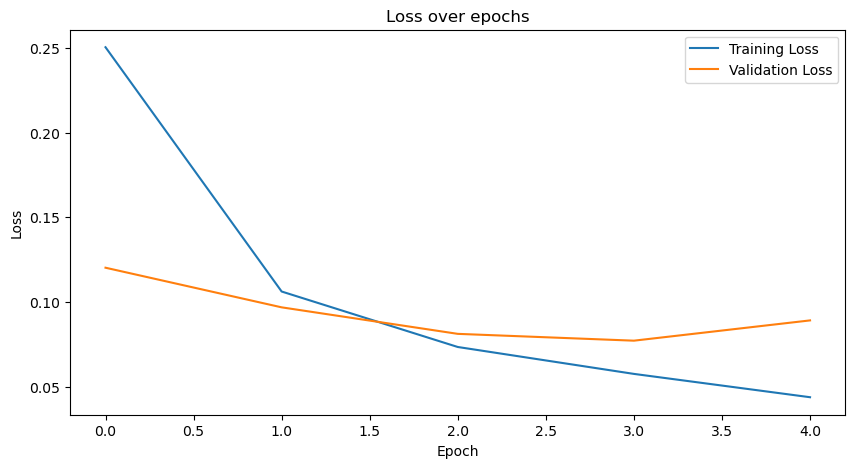

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

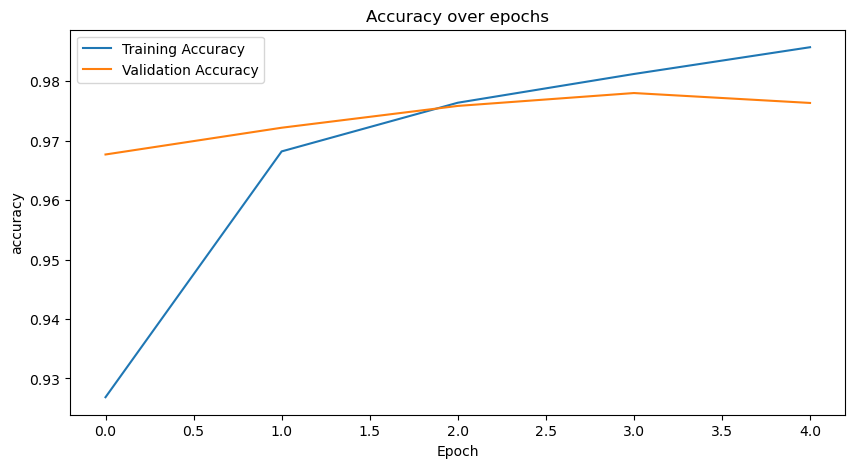

In [11]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show